## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
boston = datasets.load_boston()

x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=4)

regr = DecisionTreeRegressor(max_depth=17, max_leaf_nodes=17)

regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)

In [3]:
MSE = metrics.mean_squared_error(y_test, y_pred)
print(f'MSE is {MSE}')
print(boston.feature_names)
print("Feature importance: ", regr.feature_importances_)

MSE is 25.15685637828822
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Feature importance:  [0.07551926 0.         0.         0.         0.02036002 0.59012016
 0.         0.05401928 0.         0.00513846 0.0205565  0.
 0.23428633]


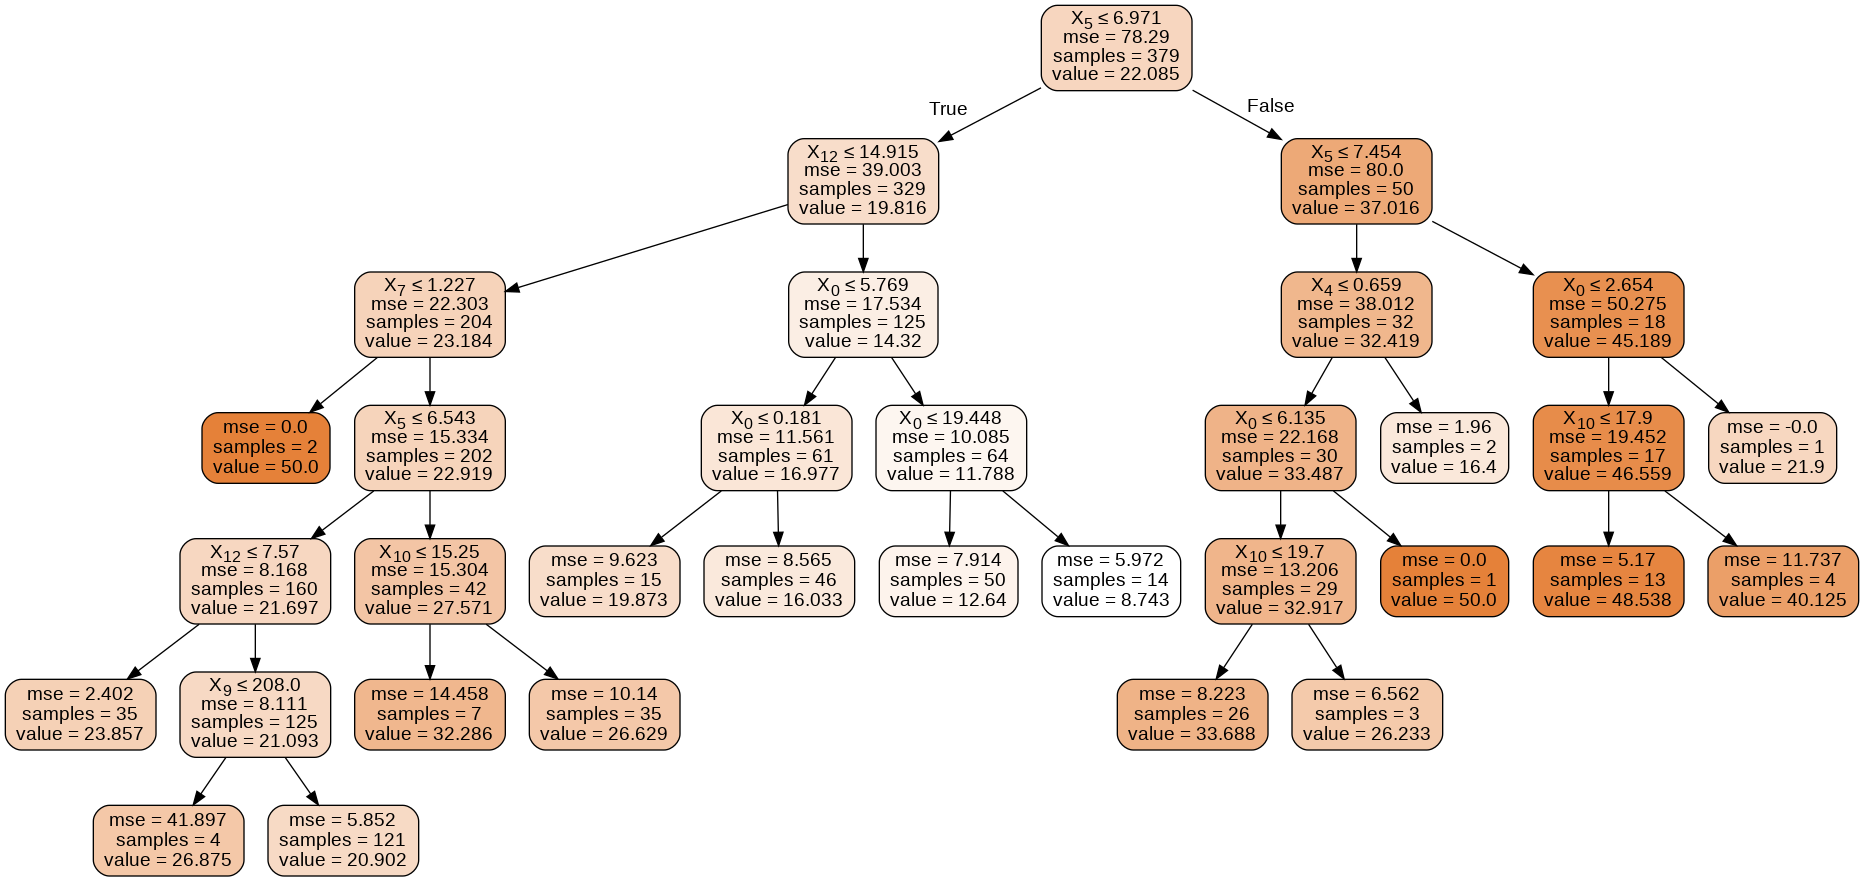

In [4]:
import pydotplus
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(regr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())